In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
female = train_data[train_data.Sex == "female"]
percent_of_female_survived = len(female[female.Survived ==1])/len(female)
percent_of_female_survived

0.7420382165605095

In [7]:
male = train_data[train_data.Sex == "male"]
percent_of_male_survived = len(male[male.Survived ==1])/len(male)
percent_of_male_survived

0.18890814558058924

In [8]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

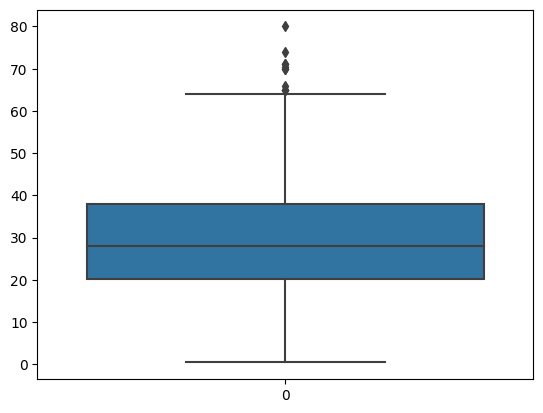

In [10]:
sns.boxplot(train_data.Age)

<Axes: xlabel='Age', ylabel='count'>

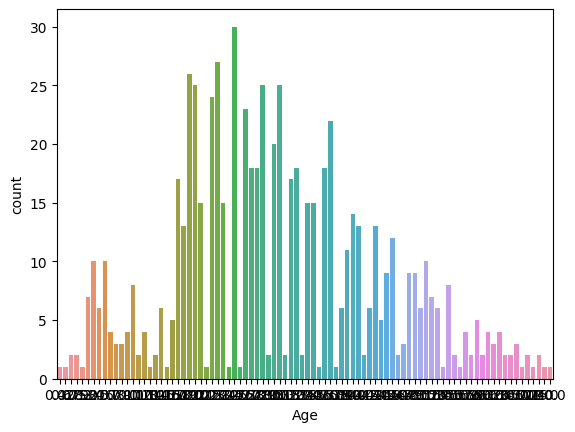

In [11]:
sns.countplot(data = train_data, x = "Age")

In [12]:
#Age is equally distributed so assigning the missing valuse to mean of the data 
train_data["Age"].fillna(train_data["Age"].mean(), inplace = True)

In [13]:
train_data.Age.value_counts(dropna = False)

Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64

<Axes: xlabel='Cabin', ylabel='count'>

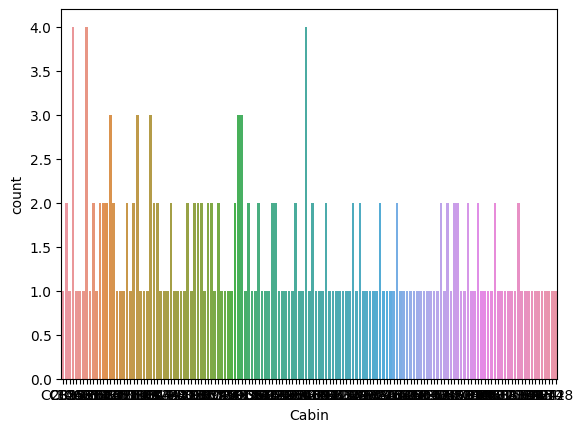

In [14]:
sns.countplot(data = train_data, x = "Cabin")

In [15]:
cabs = train_data.Cabin.nunique
cabs

<bound method IndexOpsMixin.nunique of 0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object>

In [16]:
train_data["Cabin"].isnull().sum()/len(train_data["Cabin"])

0.7710437710437711

In [17]:
#77% of Cabin values are null. So the Column is not helpful for us in teh model. 
#So lets drop the "Cabin" Column

train_data.drop('Cabin',axis=1,inplace=True)

In [18]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [20]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace = True)

In [21]:
train_data.Embarked.value_counts(dropna = False)

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

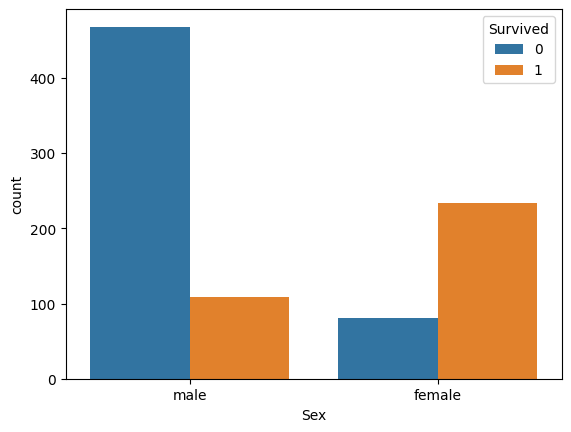

In [22]:
sns.countplot(data = train_data, x= "Sex", hue = "Survived")

<Axes: xlabel='Pclass', ylabel='count'>

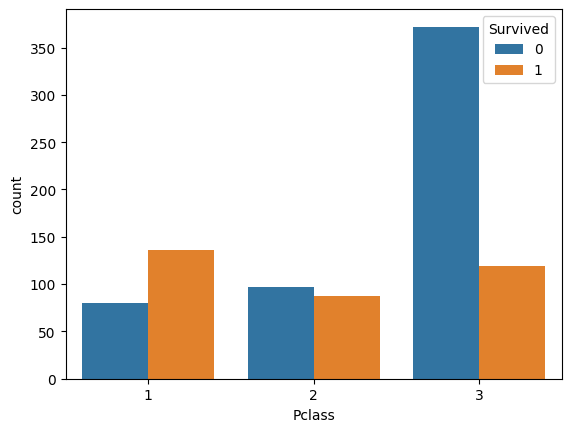

In [23]:
sns.countplot(data = train_data, x= "Pclass",hue="Survived")

<Axes: xlabel='Pclass', ylabel='Survived'>

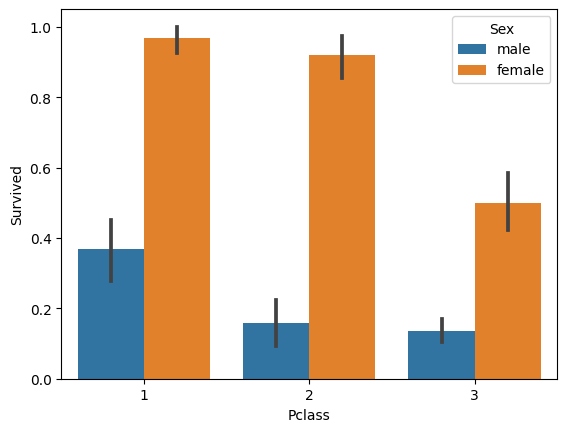

In [24]:
sns.barplot(data = train_data, x= "Pclass",y="Survived", hue = "Sex")

<Axes: xlabel='Pclass', ylabel='Survived'>

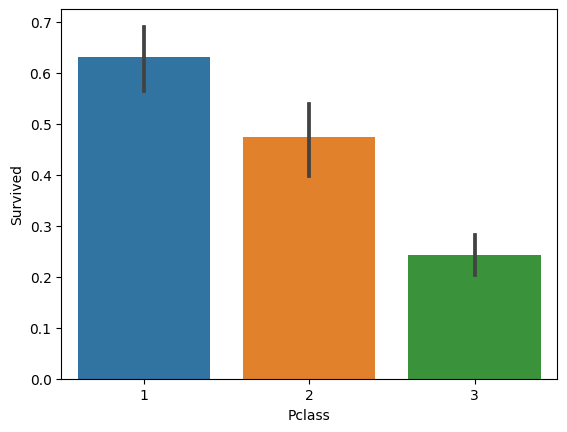

In [25]:
sns.barplot(data = train_data, x= "Pclass",y="Survived")

<Axes: xlabel='Pclass', ylabel='count'>

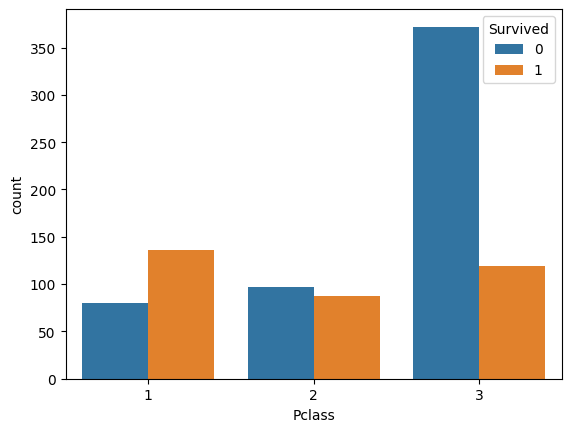

In [26]:
sns.countplot(data=train_data, x='Pclass', hue = "Survived")

<Axes: xlabel='Age', ylabel='Count'>

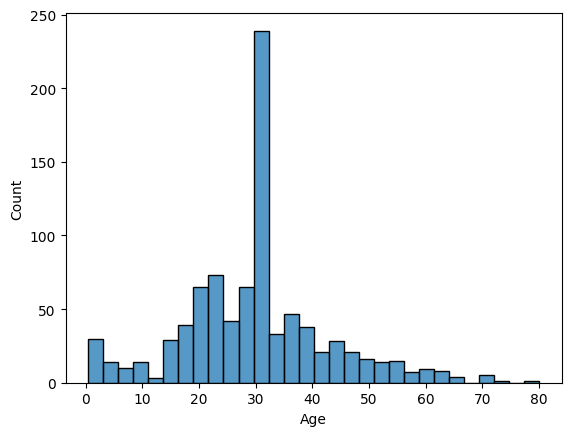

In [27]:
sns.histplot(data = train_data, x= "Age")

In [28]:
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=[0,10,20,30,40,50,60,70,80])

[Text(0, 0, '0.59375'),
 Text(0, 0, '0.382609'),
 Text(0, 0, '0.334152'),
 Text(0, 0, '0.445161'),
 Text(0, 0, '0.383721'),
 Text(0, 0, '0.404762'),
 Text(0, 0, '0.235294'),
 Text(0, 0, '0.2')]

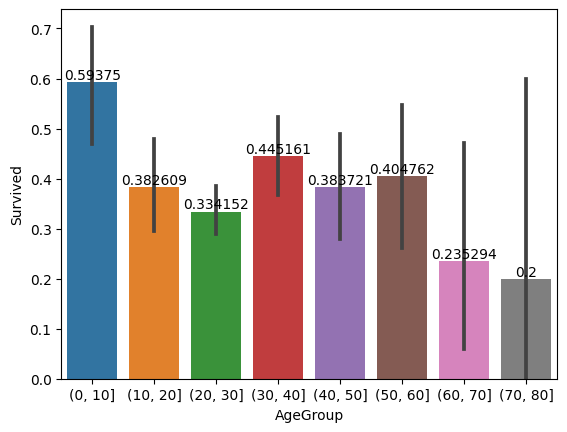

In [29]:
age_chart = sns.barplot(data = train_data, x= "AgeGroup", y= "Survived")
age_chart.bar_label(age_chart.containers[0])

<Axes: xlabel='AgeGroup', ylabel='count'>

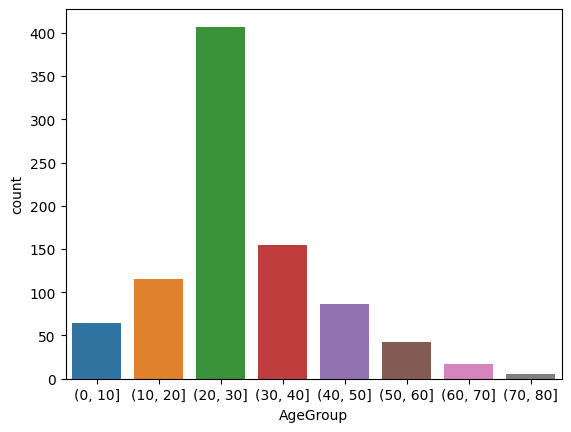

In [30]:
sns.countplot(data = train_data, x= "AgeGroup")

In [31]:
train_data.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp', ylabel='Survived'>

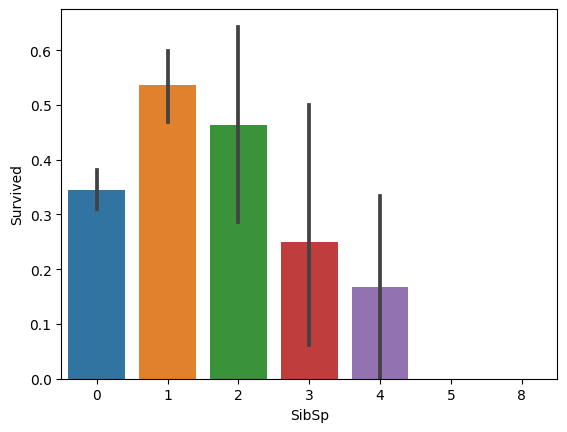

In [32]:
sns.barplot(data = train_data, x= "SibSp", y= "Survived")

<Axes: xlabel='SibSp', ylabel='count'>

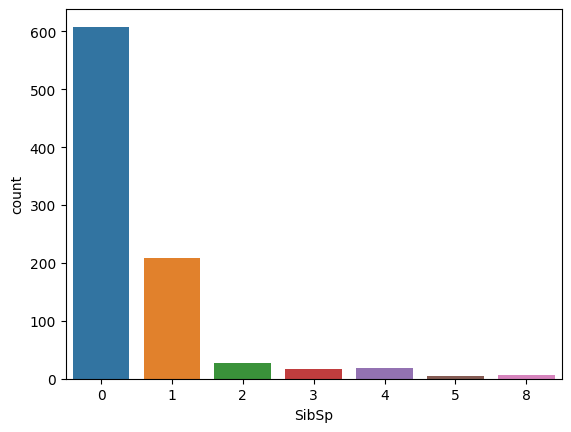

In [33]:
sns.countplot(data=train_data, x='SibSp')

In [34]:
train_data.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch', ylabel='Survived'>

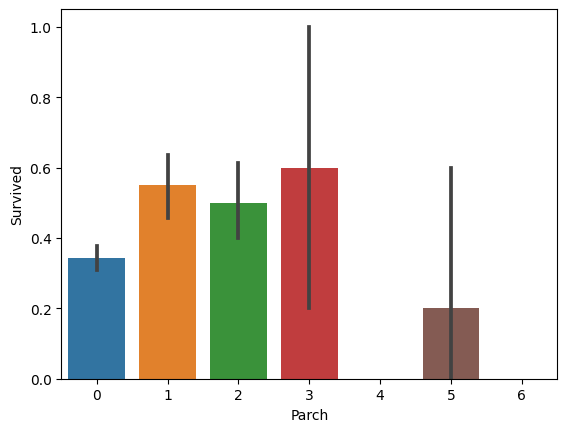

In [35]:
sns.barplot(data = train_data, x= "Parch", y= "Survived")

In [36]:
train_data.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked', ylabel='Survived'>

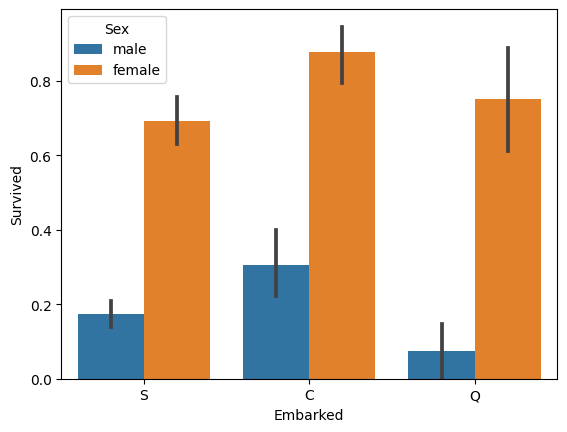

In [37]:
sns.barplot(data = train_data, x= "Embarked", y= "Survived", hue = "Sex")

In [38]:
train_data.Fare.value_counts(dropna = False)

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

<Axes: xlabel='Fare'>

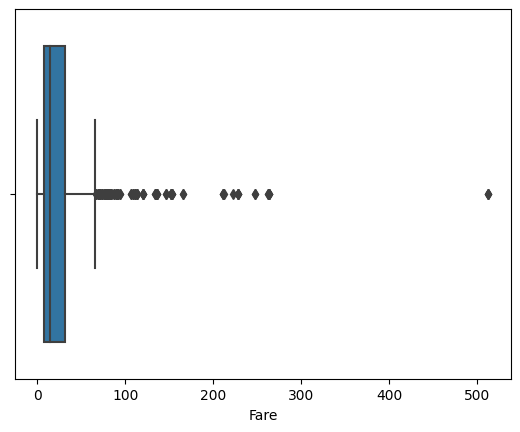

In [39]:
sns.boxplot(data = train_data, x= "Fare")

In [40]:
Fare_higher_than_100 = train_data[train_data["Fare"]>100]

In [41]:
#Survival rate of passenger whose tickets are more than 100 dollars
len(Fare_higher_than_100[Fare_higher_than_100["Survived"] == 1])/len(Fare_higher_than_100)

0.7358490566037735

In [42]:
len(Fare_higher_than_100)

53

In [43]:
len(Fare_higher_than_100[Fare_higher_than_100["Survived"] == 1])

39

In [44]:
fare_higher_than_200 = train_data[train_data["Fare"]>200]

In [45]:
#Survival rate of passenger whose tickets are more than 200 dollars
len(fare_higher_than_200[fare_higher_than_200["Survived"] == 1])/len(fare_higher_than_200)

0.7

<Axes: xlabel='Fare', ylabel='Count'>

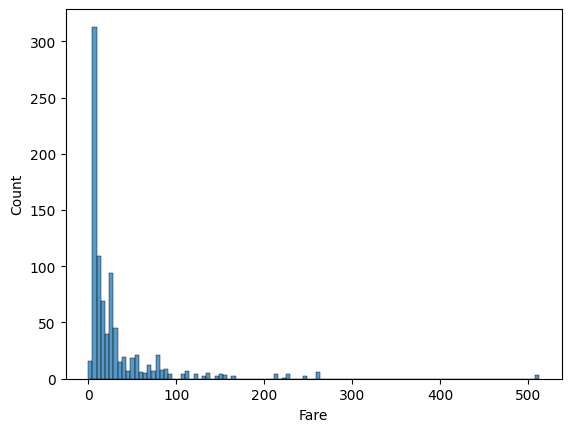

In [46]:
sns.histplot(data = train_data, x="Fare")

<Axes: xlabel='Fare'>

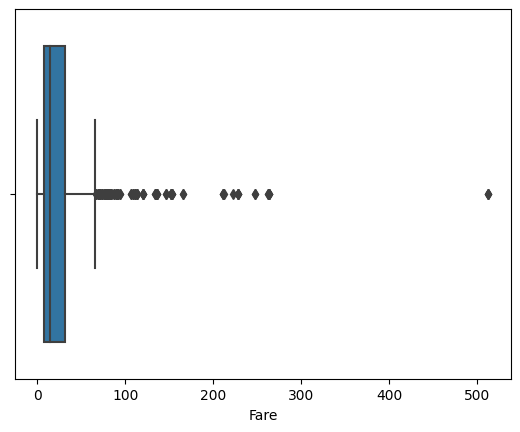

In [47]:
sns.boxplot(data = train_data, x = 'Fare')

In [48]:
Q1 = train_data['Fare'].quantile(0.25) # Q1 is data's 25% 
Q3 = train_data['Fare'].quantile(0.75) # Q3 is data's 75%
IQR = Q3 - Q1 # Interquartile Range is 50%

lower_bound = Q1 - 1.5 * IQR # outlier's lower bound Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR # outlier's higher bound Q3 + 1.5 * IQR

print(Q1)
print(Q3)
print(IQR)
print(lower_bound)
print(upper_bound)



7.9104
31.0
23.0896
-26.724
65.6344


In [49]:
fare_higher_than_upper_bound = train_data[train_data["Fare"]>65]

In [50]:
#Survival rate of passenger whose tickets are more than Q3 value(65 dollars)
len(fare_higher_than_upper_bound[fare_higher_than_upper_bound["Survived"] == 1])/len(fare_higher_than_upper_bound)

0.6810344827586207

In [51]:
# Since survival rate of passenger whose tickets are more than Q3 value(65 dollars) is 70 %. 
# So moving all the outliers to 65 value.

train_data["Fare"] = np.where(train_data["Fare"] >65, 65,train_data['Fare'])

<Axes: xlabel='Fare'>

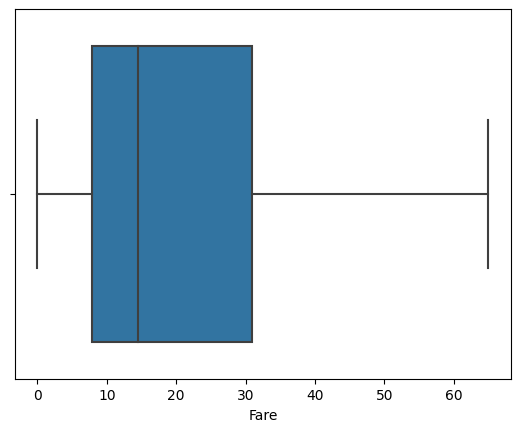

In [52]:
sns.boxplot(data = train_data, x = "Fare")

#INSIGHTS

1. Females are more probabale to survive the accident compared to Male.
2. Better Class you are travelling on, better chance of survival.
3. Irrespective of Class they are travelling on, females have equal chance of survival.
3. If you have more siblings or spouse, the odds of survival are lesser.
4. Most of the passengers travelling are of age 30-35

In [53]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'AgeGroup'],
      dtype='object')

In [54]:
useful_columns = ['Survived', 'Pclass','Fare', 'Embarked', 'Age', 'Sex','SibSp']

In [55]:
df_final = train_data[useful_columns]

In [56]:
df_final.head()

,Survived,Pclass,Fare,Embarked,Age,Sex,SibSp
0,0,3,7.250,S,22.0,male,1
1,1,1,65.000,C,38.0,female,1
2,1,3,7.925,S,26.0,female,0
3,1,1,53.100,S,35.0,female,1
4,0,3,8.050,S,35.0,male,0


In [57]:
df_final = pd.get_dummies(df_final)

df_final.head()

,Survived,Pclass,Fare,Age,SibSp,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,7.250,22.0,1,False,False,True,False,True
1,1,1,65.000,38.0,1,True,False,False,True,False
2,1,3,7.925,26.0,0,False,False,True,True,False
3,1,1,53.100,35.0,1,False,False,True,True,False
4,0,3,8.050,35.0,0,False,False,True,False,True


In [58]:
df_final.corr()

,Survived,Pclass,Fare,Age,SibSp,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
Survived,1.000000,-0.338481,0.317561,-0.069809,-0.035322,0.168240,0.003650,-0.149683,0.543351,-0.543351
Pclass,-0.338481,1.000000,-0.715624,-0.331339,0.083081,-0.243292,0.221009,0.074053,-0.131900,0.131900
Fare,0.317561,-0.715624,1.000000,0.137642,0.332647,0.263075,-0.171750,-0.122382,0.234768,-0.234768
Age,-0.069809,-0.331339,0.137642,1.000000,-0.232625,0.032024,-0.013855,-0.019336,-0.084153,0.084153
SibSp,-0.035322,0.083081,0.332647,-0.232625,1.000000,-0.059528,-0.026354,0.068734,0.114631,-0.114631
Embarked_C,0.168240,-0.243292,0.263075,0.032024,-0.059528,1.000000,-0.148258,-0.782742,0.082853,-0.082853
Embarked_Q,0.003650,0.221009,-0.171750,-0.013855,-0.026354,-0.148258,1.000000,-0.499421,0.074115,-0.074115
Embarked_S,-0.149683,0.074053,-0.122382,-0.019336,0.068734,-0.782742,-0.499421,1.000000,-0.119224,0.119224
Sex_female,0.543351,-0.131900,0.234768,-0.084153,0.114631,0.082853,0.074115,-0.119224,1.000000,-1.000000
Sex_male,-0.543351,0.131900,-0.234768,0.084153,-0.114631,-0.082853,-0.074115,0.119224,-1.000000,1.000000


<Axes: >

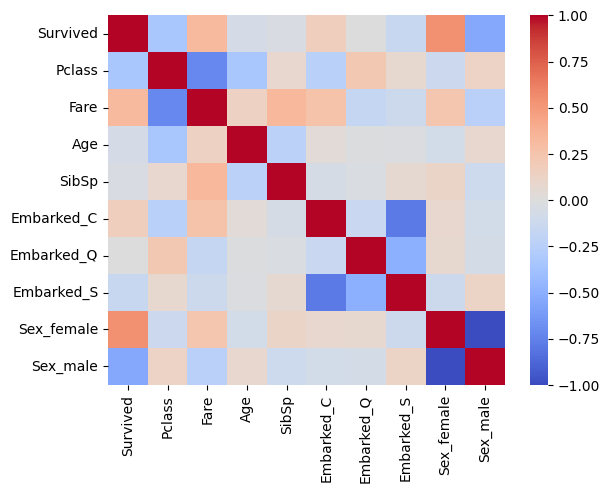

In [59]:
sns.heatmap(df_final.corr(),cmap = 'coolwarm')

In [60]:
df_final.corr()['Survived'].sort_values(ascending = True).to_frame()

,Survived
Sex_male,-0.543351
Pclass,-0.338481
Embarked_S,-0.149683
Age,-0.069809
SibSp,-0.035322
Embarked_Q,0.003650
Embarked_C,0.168240
Fare,0.317561
Sex_female,0.543351
Survived,1.000000


In [61]:
# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier

In [62]:
X = df_final.drop('Survived', axis = 1)
y = df_final['Survived']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [64]:
X_train.head()

,Pclass,Fare,Age,SibSp,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
6,1,51.8625,54.000000,0,False,False,True,False,True
718,3,15.5000,29.699118,0,False,True,False,False,True
685,2,41.5792,25.000000,1,True,False,False,False,True
73,3,14.4542,26.000000,1,True,False,False,False,True
882,3,10.5167,22.000000,0,False,False,True,True,False
